In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [294]:
df = pd.read_excel("test.xlsx", sheet_name="Arkusz1")
df = pd.read_excel("test.xlsx")
df = df[['Year', 'Married', 'Income', "Mean age", "Household"]]

In [295]:
df.describe()

,Year,Married,Income,Mean age,Household
count,23.00000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,130663.173913,29424.347826,27.493478,119526.086957
std,6.78233,4969.723969,5971.686853,1.174086,7576.810008
min,2000.00000,120211.000000,22130.000000,25.950000,104705.000000
25%,2005.50000,127473.000000,25355.000000,26.425000,113863.500000
50%,2011.00000,130767.000000,28070.000000,27.400000,119927.000000
75%,2016.50000,134924.500000,33425.000000,28.450000,126021.500000
max,2022.00000,137772.000000,42330.000000,29.450000,131202.000000


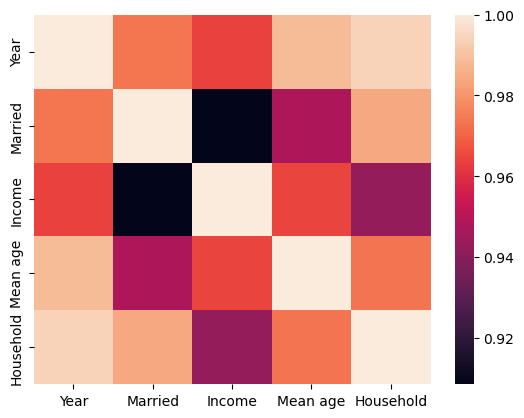

In [296]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [297]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

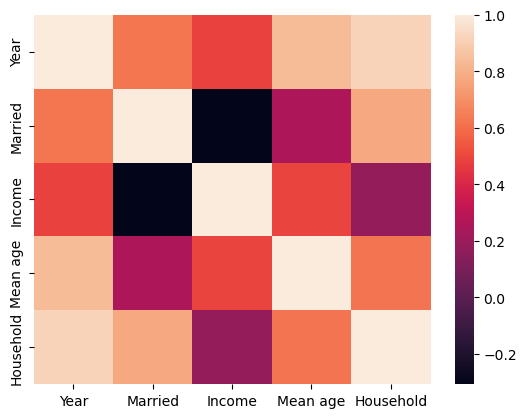

In [298]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [299]:
new

,Year,Married,Income,Mean age,Household
Year,1.000000,0.973903,0.964185,0.988373,0.993961
Married,0.973903,1.000000,0.908483,0.947680,0.984306
Income,0.964185,0.908483,1.000000,0.964535,0.942613
Mean age,0.988373,0.947680,0.964535,1.000000,0.973480
Household,0.993961,0.984306,0.942613,0.973480,1.000000


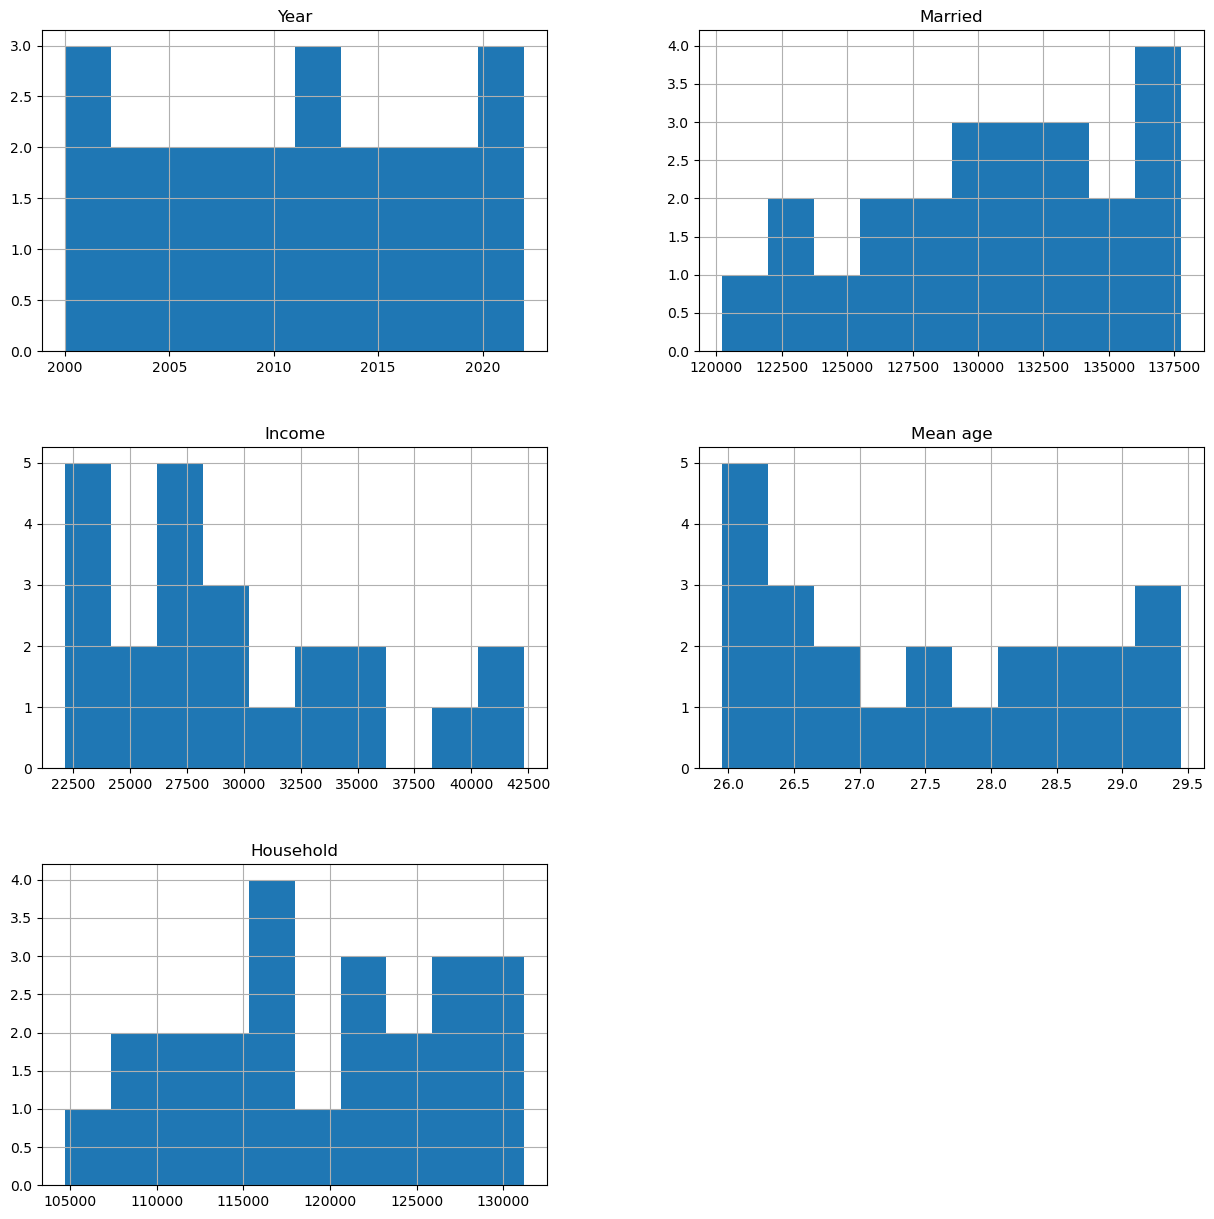

In [300]:

df.hist(figsize=(15,15), bins=10)
plt.show()

In [301]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parameter testing

In [302]:

# sim

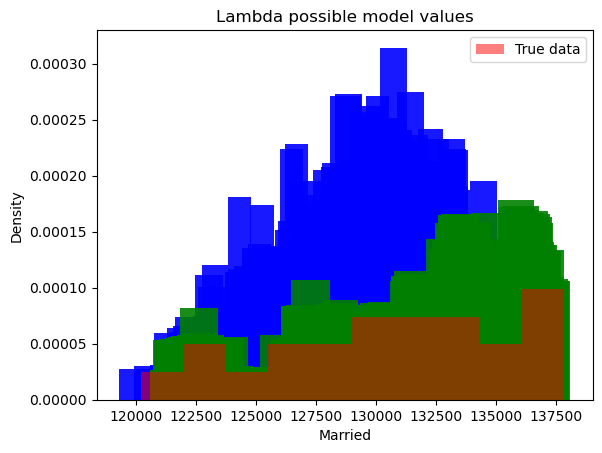

In [303]:
from numpy import random
alpha = 0.46
beta = 143000

sim = random.normal(-alpha*df['Income'] + beta, 1500, (100,23))

for i in range(len(sim)):
    plt.hist(sim[i], color='blue', alpha = 0.9, density=True)

sim = random.poisson(-alpha*1.7*df['Income'] + beta*1.08, (100,23))

for i in range(len(sim)):
    plt.hist(sim[i], color='green', alpha = 0.9, density=True)

plt.hist(df['Married'], color='red', alpha = 0.5, density=True, label='True data')
plt.title('Lambda possible model values')
plt.xlabel('Married')
plt.ylabel('Density')
plt.legend()
plt.show()

In [304]:
beta*1.08

154440.0

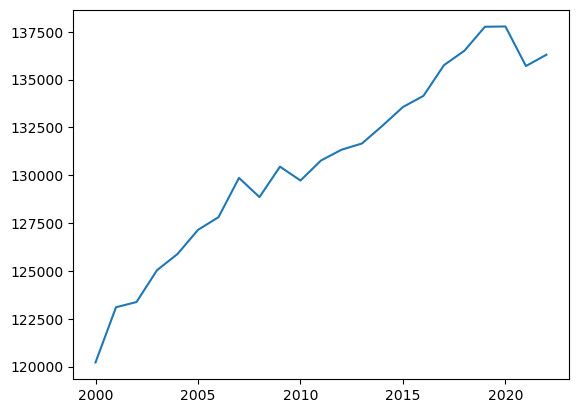

In [305]:
plt.plot(df['Year'], df['Married'])
plt.show()

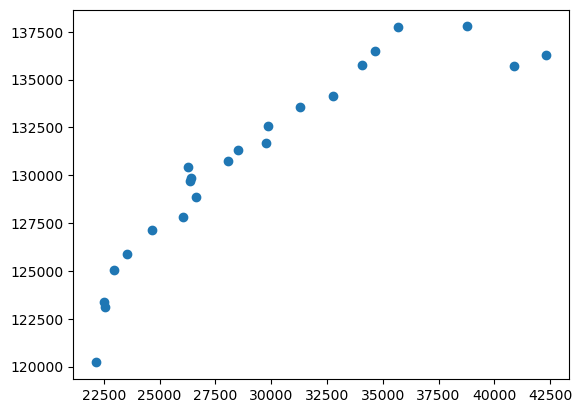

In [306]:
plt.scatter(df['Income'], df['Married'])
plt.show()

# Income na małżeństwa

In [307]:
model = CmdStanModel(stan_file='prior.stan')
#model = CmdStanModel(stan_file='model_adam_1_prior.stan')
N = 23
R = 30

In [308]:
data = {'N': N, 'income': df['Income']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

23:09:47 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


23:09:47 - cmdstanpy - INFO - CmdStan done processing.


In [309]:
gen_1.draws_pd()

,lp__,accept_stat__,alpha,beta,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.000271,0.000078,95140.0,64332.0,36088.0,15847.0,12051.0,10137.0,...,1234.0,1375.0,1305.0,1205.0,807.0,572.0,513.0,466.0,477.0,441.0
1,0.0,0.0,-0.000036,0.000074,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000140,0.000074,335.0,310.0,248.0,144.0,131.0,106.0,...,41.0,39.0,34.0,47.0,39.0,26.0,31.0,22.0,19.0,23.0
3,0.0,0.0,0.000012,0.000064,0.0,5.0,2.0,2.0,0.0,6.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0
4,0.0,0.0,-0.000171,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.000064,0.000043,12.0,13.0,6.0,3.0,7.0,6.0,...,1.0,11.0,6.0,2.0,6.0,4.0,3.0,10.0,8.0,8.0
6,0.0,0.0,-0.000012,-0.000037,2.0,1.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.000003,0.000098,0.0,2.0,1.0,2.0,3.0,2.0,...,0.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.0,0.0,-0.000027,-0.000064,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.000038,-0.000138,4.0,2.0,5.0,1.0,3.0,5.0,...,1.0,4.0,4.0,2.0,2.0,3.0,2.0,3.0,1.0,3.0


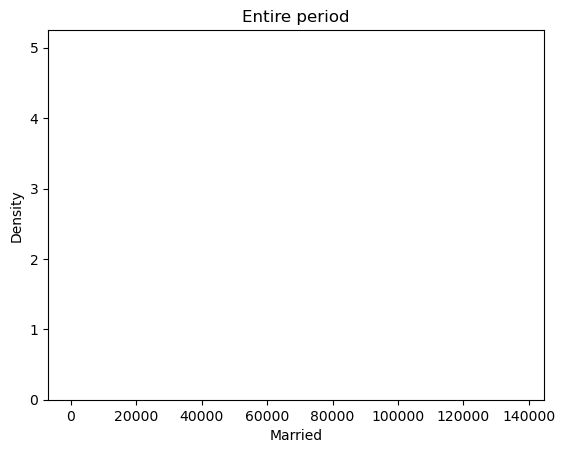

In [310]:
for i in range(R):
    plt.hist(gen_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)
plt.hist(df['Married'], bins=23, color='red', density=True)
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.show()

In [311]:
post_model = CmdStanModel(stan_file='posterior.stan')


ValueError: Failed to get source info for Stan model 'C:\Users\Julia\Desktop\Data analysis\Project\DA_project\posterior.stan'. Console:
Warning in 'C:\Users\Julia\Desktop\Data analysis\Project\DA_project\posterior.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Syntax error in 'C:\Users\Julia\Desktop\Data analysis\Project\DA_project\posterior.stan', line 24, column 11 to column 12, parsing error:
   -------------------------------------------------
    22:  
    23:  generated quantities {
    24:    int<lower> y_sim[N];
                    ^
    25:    for (n in 1:N) {
    26:      y_sim[n] = poisson_rng(-alpha * income[n] + beta);
   -------------------------------------------------

Expected "=" expression (not containing binary logical operators), after "lower".


In [ ]:
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

02:18:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status02:18:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed


02:18:09 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:

Command and output files:
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['C:\\Users\\Julia\\Desktop\\Data analysis\\Project\\DA_project\\posterior.exe', 'id=1', 'random', 'seed=99410', 'data', 'file=C:\\Users\\Julia\\AppData\\Local\\Temp\\tmp11ts5rda\\xozzub56.json', 'output', 'file=C:\\Users\\Julia\\AppData\\Local\\Temp\\tmp11ts5rda\\posteriorpty658tq\\posterior-20240608021809.csv', 'method=sample', 'num_samples=30', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\Julia\AppData\Local\Temp\tmp11ts5rda\posteriorpty658tq\posterior-20240608021809.csv
 console_msgs (if any):
	C:\Users\Julia\AppData\Local\Temp\tmp11ts5rda\posteriorpty658tq\posterior-20240608021809_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

In [ ]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,y_sim[1],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,32398500.0,1.000000,0.1603,2.0,3.0,0.0,-32398500.0,0.618953,112727.0,138739.0,...,128747.0,129521.0,129510.0,128716.0,128246.0,126975.0,127021.0,126389.0,126535.0,127414.0
1,32398500.0,0.843899,0.1603,2.0,3.0,0.0,-32398500.0,0.619277,112759.0,139612.0,...,128888.0,129828.0,128584.0,129098.0,128087.0,127302.0,127317.0,126805.0,126806.0,126703.0
2,32398500.0,1.000000,0.1603,3.0,11.0,0.0,-32398500.0,0.624596,112559.0,139579.0,...,128218.0,129287.0,129173.0,128587.0,128168.0,127135.0,127131.0,127022.0,126318.0,126121.0
3,32398500.0,0.990044,0.1603,3.0,15.0,0.0,-32398500.0,0.613355,112824.0,138628.0,...,129418.0,128451.0,129079.0,129134.0,127850.0,127595.0,127327.0,126772.0,126360.0,126950.0
4,32398500.0,0.869981,0.1603,3.0,11.0,0.0,-32398500.0,0.602512,113073.0,138845.0,...,128619.0,129064.0,129477.0,128329.0,127562.0,127214.0,126743.0,126287.0,126575.0,126609.0
5,32398500.0,0.877870,0.1603,2.0,7.0,0.0,-32398500.0,0.603355,113191.0,139054.0,...,129499.0,129263.0,129160.0,129321.0,128284.0,127832.0,126758.0,126233.0,126639.0,126373.0
6,32398500.0,0.998036,0.1603,3.0,7.0,0.0,-32398500.0,0.599206,113295.0,138537.0,...,129190.0,128944.0,129623.0,129339.0,128412.0,127421.0,127134.0,127029.0,126306.0,126021.0
7,32398500.0,0.895355,0.1603,2.0,3.0,0.0,-32398500.0,0.599014,113352.0,139150.0,...,129047.0,129308.0,128635.0,129259.0,127665.0,127284.0,126975.0,126391.0,127212.0,126952.0
8,32398500.0,0.967165,0.1603,3.0,7.0,0.0,-32398500.0,0.596013,113357.0,138603.0,...,128757.0,129184.0,128255.0,129031.0,127911.0,126952.0,127304.0,126364.0,127365.0,125749.0
9,32398500.0,0.850849,0.1603,2.0,3.0,0.0,-32398500.0,0.596023,113451.0,138832.0,...,129194.0,129409.0,128582.0,128570.0,127993.0,127389.0,127156.0,127059.0,127217.0,126391.0


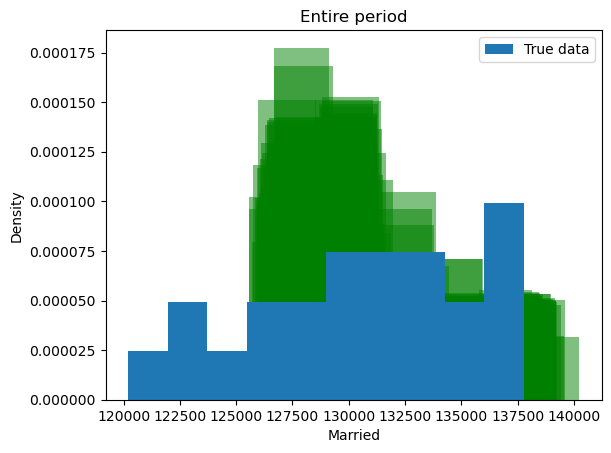

In [ ]:

for i in range(R):
    plt.hist(fit_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)

plt.hist(df['Married'], density=True, label= 'True data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

# Analiza

In [ ]:
az.summary(fit_1)

arviz - WARNING - Shape validation failed: input_shape: (1, 30), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.618,0.013,0.596,0.632,0.009,0.008,2.0,16.0,NaN
beta,112708.933,399.471,112233.000,113397.000,269.917,224.331,2.0,20.0,NaN
y_sim[0],138903.000,455.287,138150.000,139612.000,100.863,72.380,24.0,39.0,NaN
y_sim[1],137945.467,423.150,137301.000,138676.000,66.865,47.630,30.0,20.0,NaN
y_sim[2],136623.933,481.305,135888.000,137260.000,126.484,91.304,24.0,39.0,NaN
y_sim[3],134808.933,462.487,133927.000,135493.000,97.563,69.903,20.0,16.0,NaN
y_sim[4],134170.467,400.031,133467.000,134905.000,79.810,57.103,25.0,16.0,NaN
y_sim[5],133772.667,385.825,133090.000,134377.000,181.507,137.682,4.0,35.0,NaN
y_sim[6],132952.067,355.758,132396.000,133626.000,104.337,75.894,10.0,20.0,NaN
y_sim[7],132129.267,270.610,131675.000,132604.000,68.164,49.120,17.0,39.0,NaN


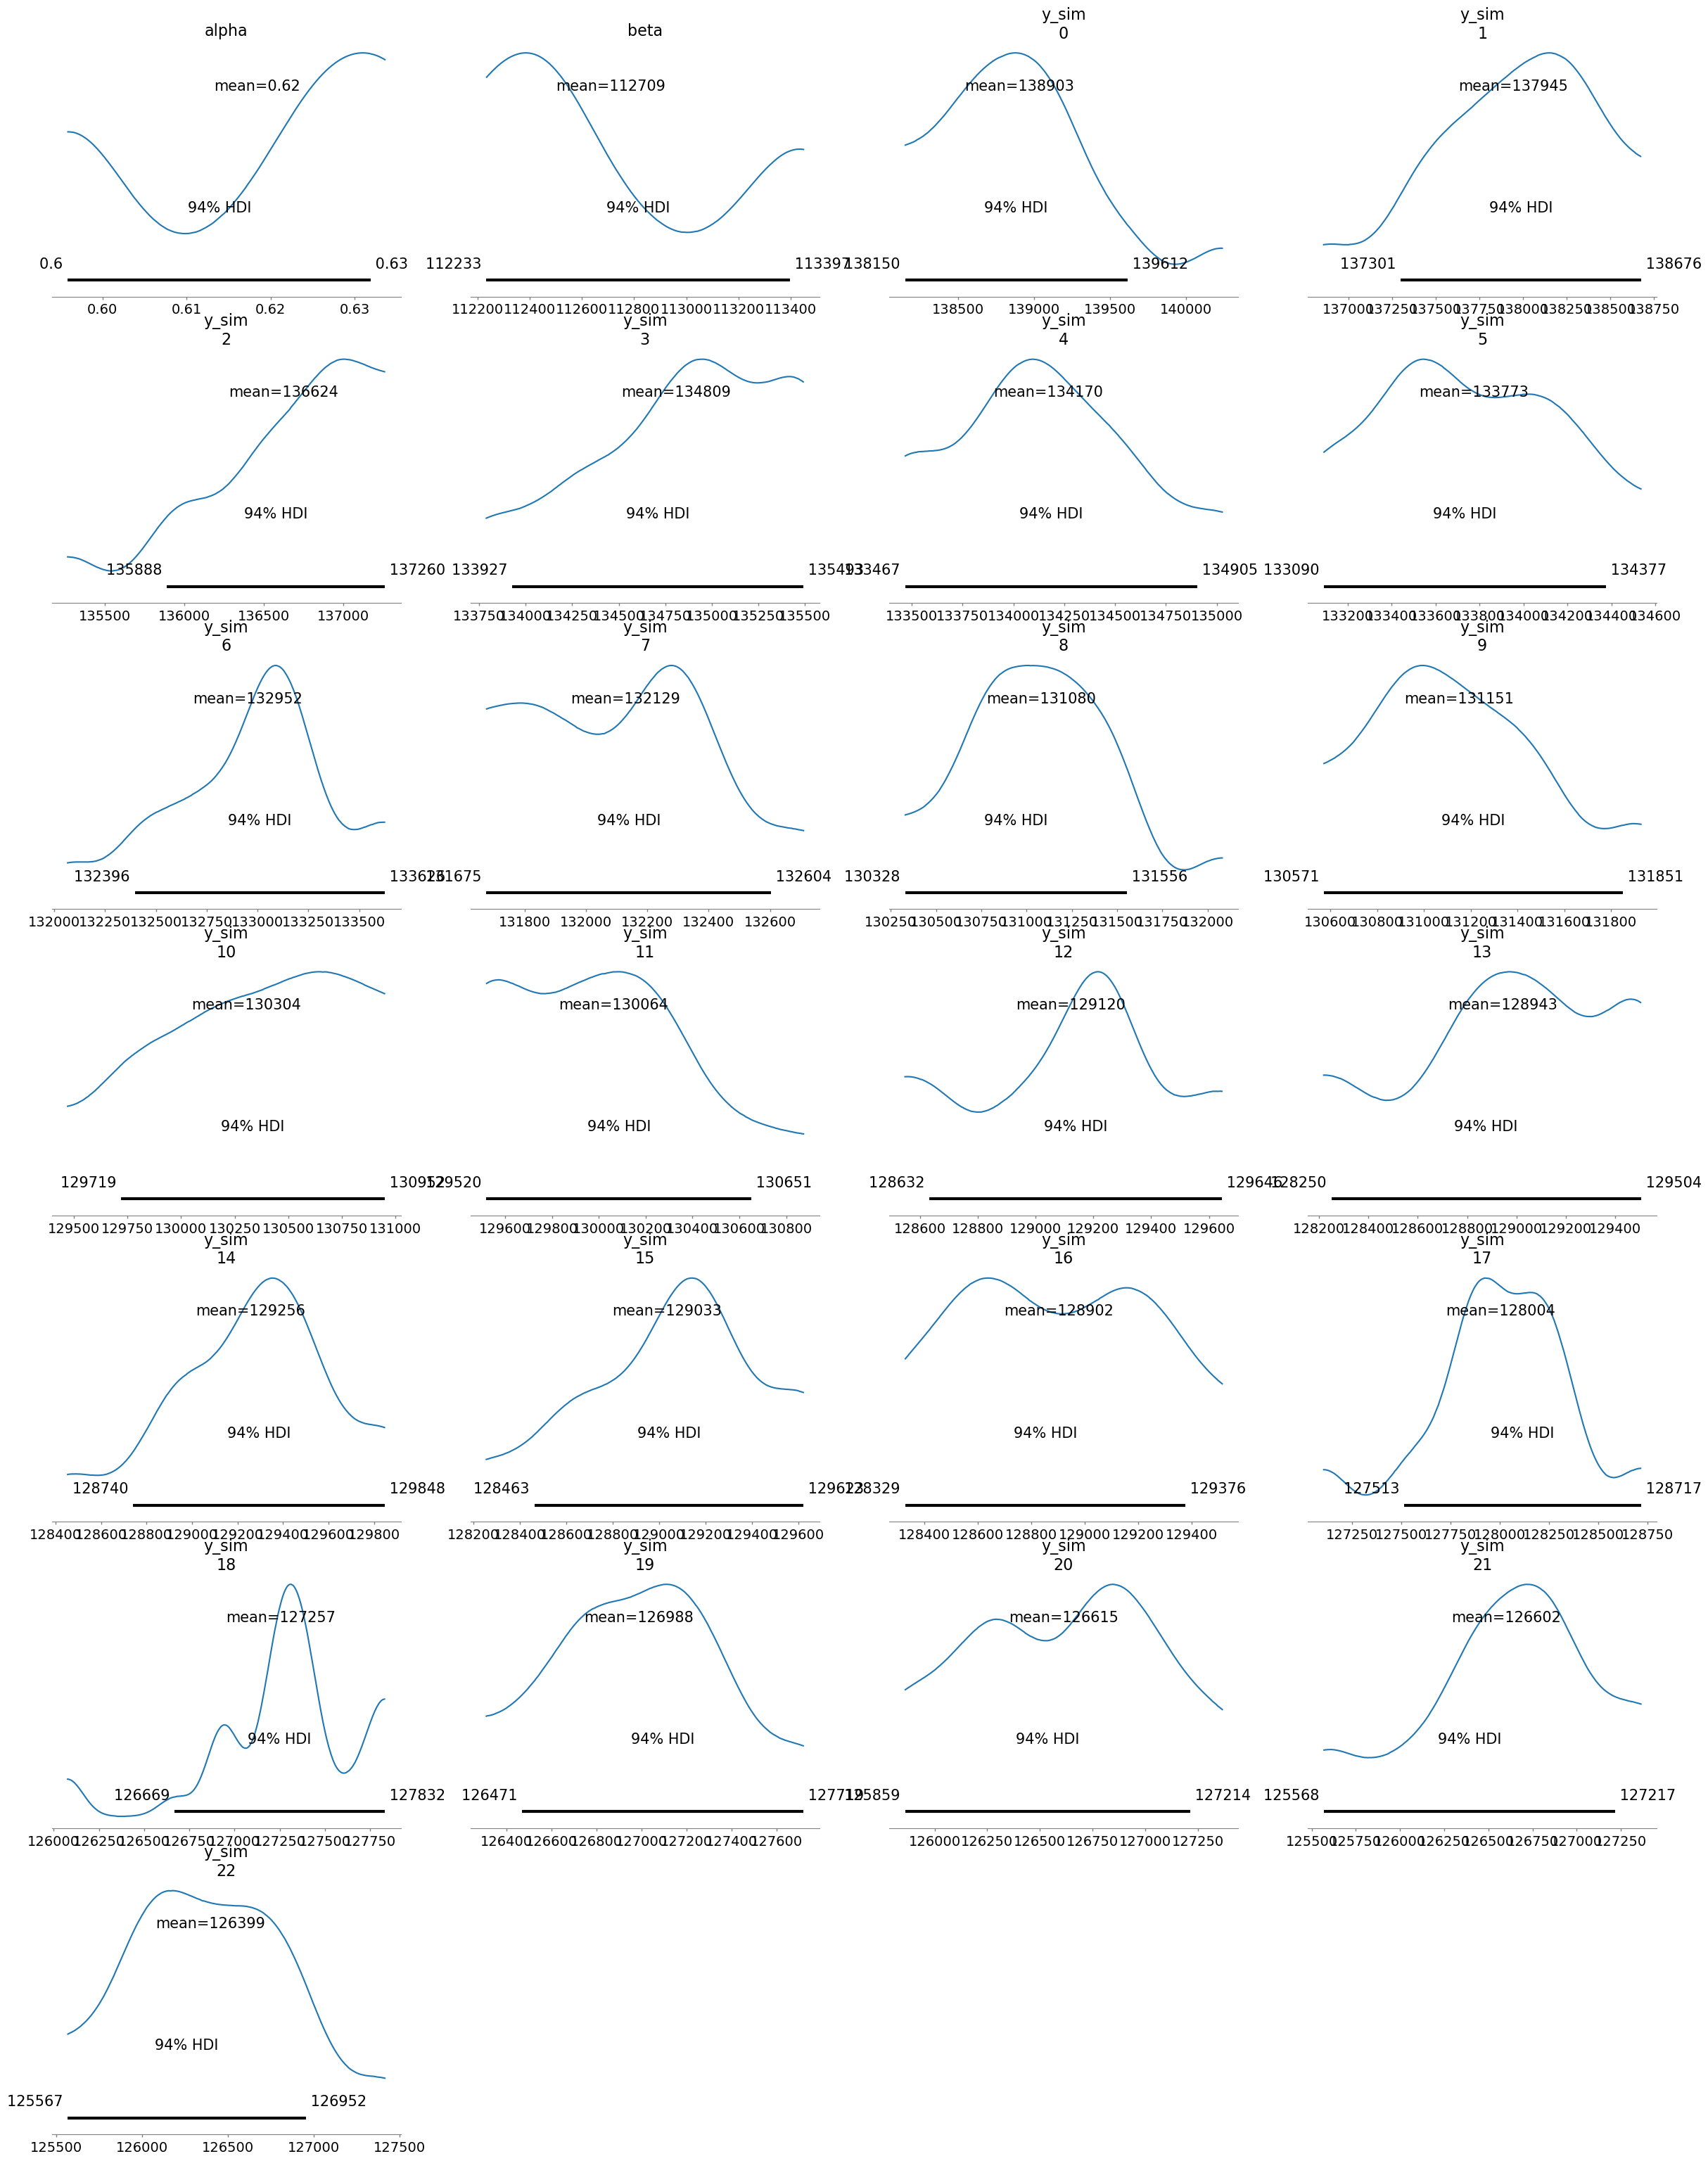

In [ ]:
az.plot_posterior(fit_1)
plt.show()

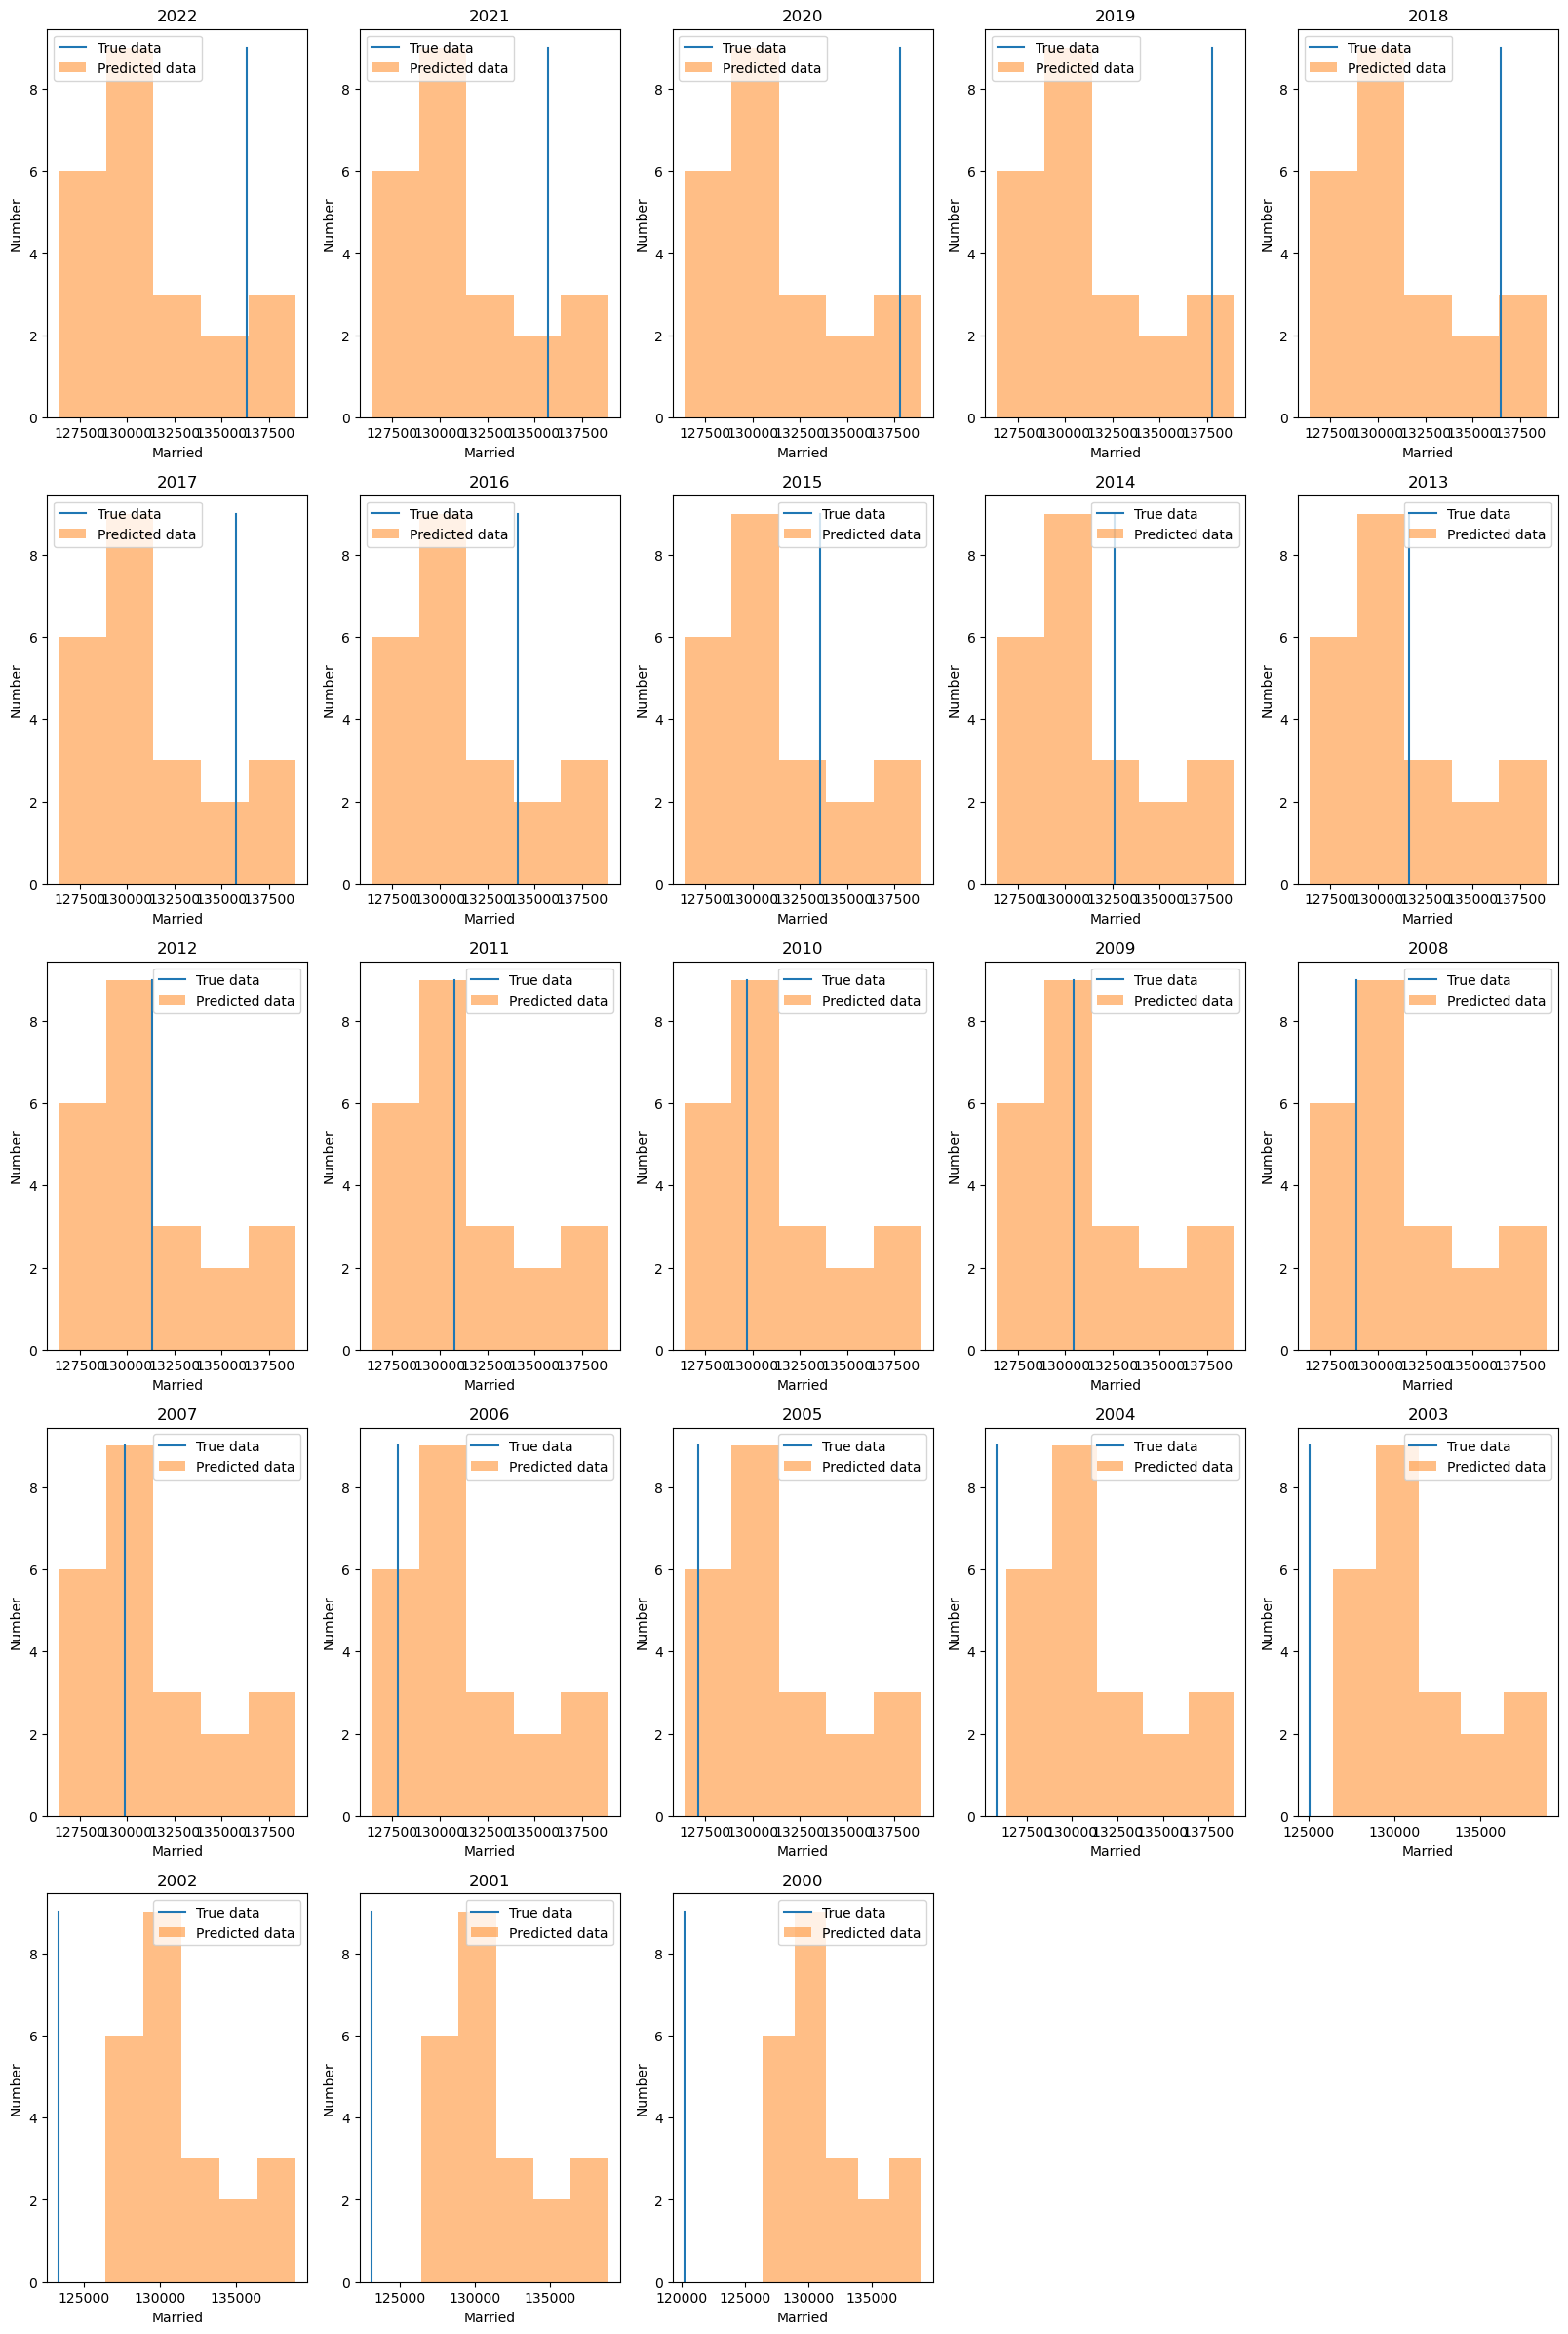

In [ ]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_1.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

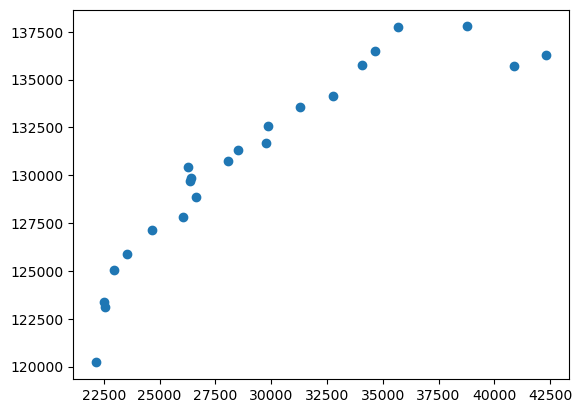

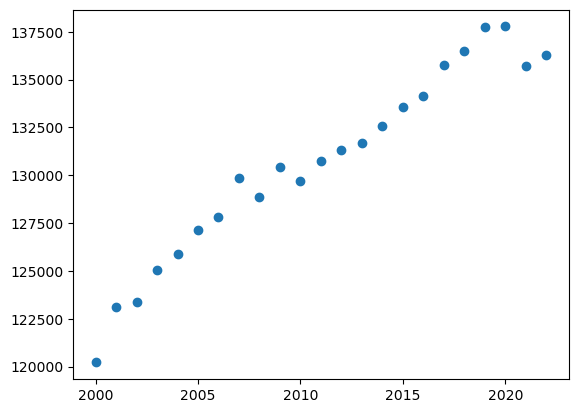

In [ ]:
plt.scatter(df['Income'], df['Married'])

# for i in range(24):
#     plt.plot(df['Income'].values, fit_1.alpha[i] + fit_1.theta[i]*df['Income'])
plt.show()

plt.scatter(df['Year'], df['Married'])
# for i in range(24):
#     plt.plot(df['Year'].values, fit_1.alpha[i] + fit_1.theta[i]*df['Income'])
plt.show()

# Income i Household na ilość małżeństw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


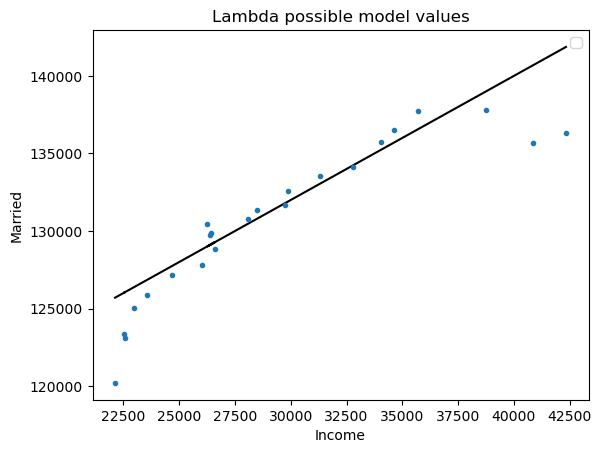

In [312]:
from numpy import random
alpha = 0.8
beta = 108000

sim = random.normal(alpha*df['Income'] + beta, 1500, 23)


plt.plot(df['Income'], alpha*df['Income'] + beta, color='black')

plt.plot(df['Income'], df['Married'],'.')
plt.title('Lambda possible model values')
plt.xlabel('Income')
plt.ylabel('Married')
plt.legend()
plt.show()

In [313]:
model = CmdStanModel(stan_file='model_prior.stan')
data = {'N': N, 'income': df['Income']}
gen_2 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True)

23:10:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


23:10:22 - cmdstanpy - INFO - CmdStan done processing.


In [314]:
gen_2.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.794917,105387.0,1.017790,139035.0,137866.0,136199.0,133765.0,132923.0,...,126270.0,126540.0,126379.0,126086.0,124998.0,124107.0,123647.0,123297.0,123329.0,122979.0
1,0.0,0.0,0.724983,107241.0,1.529640,137927.0,136863.0,135339.0,133123.0,132354.0,...,126286.0,126531.0,126388.0,126117.0,125126.0,124313.0,123894.0,123575.0,123603.0,123285.0
2,0.0,0.0,0.884343,106926.0,0.030420,144361.0,143061.0,141204.0,138498.0,137560.0,...,130158.0,130459.0,130282.0,129955.0,128743.0,127753.0,127240.0,126851.0,126886.0,126497.0
3,0.0,0.0,0.849451,108299.0,0.086464,144256.0,143007.0,141223.0,138624.0,137724.0,...,130614.0,130903.0,130733.0,130418.0,129255.0,128303.0,127811.0,127437.0,127471.0,127097.0
4,0.0,0.0,0.833681,108759.0,0.807373,144050.0,142824.0,141072.0,138521.0,137637.0,...,130660.0,130942.0,130777.0,130467.0,129326.0,128392.0,127908.0,127541.0,127575.0,127208.0
5,0.0,0.0,0.670690,106559.0,2.436760,134950.0,133965.0,132555.0,130502.0,129785.0,...,124175.0,124407.0,124275.0,124021.0,123106.0,122352.0,121968.0,121670.0,121692.0,121401.0
6,0.0,0.0,0.762167,106713.0,0.083827,138975.0,137855.0,136255.0,133922.0,133114.0,...,126735.0,126994.0,126842.0,126560.0,125516.0,124662.0,124220.0,123884.0,123915.0,123580.0
7,0.0,0.0,0.773293,104427.0,1.080720,137161.0,136024.0,134400.0,132034.0,131213.0,...,124744.0,125006.0,124850.0,124563.0,123505.0,122639.0,122192.0,121849.0,121879.0,121540.0
8,0.0,0.0,0.760747,110499.0,1.457570,142698.0,141582.0,139985.0,137657.0,136853.0,...,130482.0,130744.0,130590.0,130308.0,129266.0,128416.0,127975.0,127641.0,127669.0,127335.0
9,0.0,0.0,0.814507,106455.0,0.915871,140932.0,139737.0,138027.0,135535.0,134670.0,...,127853.0,128129.0,127966.0,127667.0,126550.0,125637.0,125166.0,124807.0,124841.0,124481.0


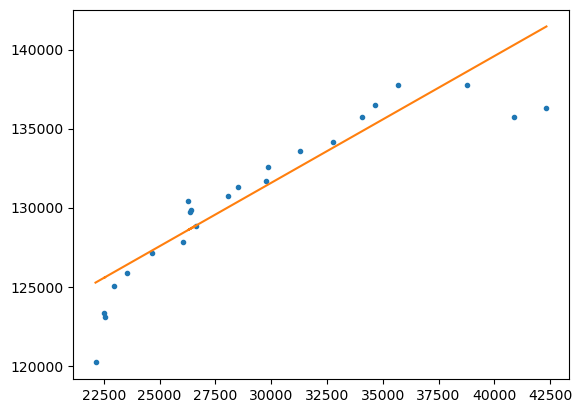

In [315]:
alpha = np.mean(gen_2.alpha)
beta = np.mean(gen_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

In [316]:
post_model = CmdStanModel(stan_file='model.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_2 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

23:10:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


23:10:28 - cmdstanpy - INFO - CmdStan done processing.


In [317]:
fit_2.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,-9844.63,0.999027,0.106205,5.0,31.0,0.0,9845.78,0.751639,108561.0,98.0892,...,128228.0,128506.0,128352.0,128231.0,127064.0,126155.0,125795.0,125439.0,125419.0,125157.0
1,-9843.66,0.982974,0.106205,4.0,15.0,0.0,9844.84,0.753020,108508.0,98.2467,...,128287.0,128505.0,128389.0,127846.0,127035.0,126171.0,125844.0,125511.0,125502.0,125269.0
2,-9843.83,0.888624,0.106205,2.0,3.0,0.0,9844.66,0.753276,108507.0,98.1665,...,128282.0,128615.0,128341.0,127936.0,127313.0,126319.0,125772.0,125524.0,125514.0,125137.0
3,-9844.64,0.870737,0.106205,2.0,3.0,0.0,9844.68,0.752514,108496.0,98.1860,...,128265.0,128413.0,128450.0,128163.0,127110.0,126100.0,125754.0,125392.0,125368.0,125093.0
4,-9844.43,0.971192,0.106205,5.0,63.0,0.0,9845.75,0.761036,108264.0,99.1346,...,128415.0,128551.0,128216.0,128176.0,127046.0,126250.0,125696.0,125371.0,125348.0,125116.0
5,-9844.78,0.989658,0.106205,2.0,7.0,0.0,9845.02,0.761203,108254.0,99.2272,...,128475.0,128365.0,128216.0,128273.0,127102.0,125953.0,125827.0,125448.0,125345.0,124893.0
6,-9843.84,0.971843,0.106205,5.0,31.0,0.0,9845.33,0.757458,108390.0,98.1148,...,128201.0,128453.0,128242.0,128163.0,127104.0,126248.0,125805.0,125213.0,125466.0,125011.0
7,-9843.91,0.904208,0.106205,3.0,7.0,0.0,9844.67,0.756726,108375.0,98.2127,...,128286.0,128642.0,128331.0,128075.0,126852.0,126212.0,125781.0,125380.0,125458.0,125120.0
8,-9843.32,1.000000,0.106205,2.0,3.0,0.0,9843.98,0.757065,108383.0,98.2385,...,128224.0,128604.0,128264.0,128030.0,126997.0,126254.0,125602.0,125477.0,125491.0,125122.0
9,-9843.76,0.895741,0.106205,2.0,7.0,0.0,9844.91,0.757170,108380.0,98.0352,...,128249.0,128520.0,128335.0,128135.0,127079.0,126189.0,125867.0,125387.0,125562.0,125230.0


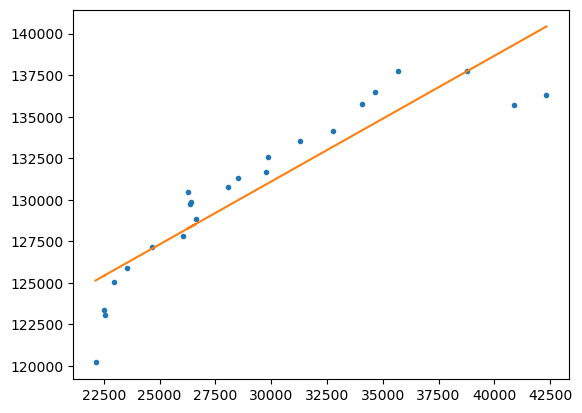

In [318]:
alpha = np.mean(fit_2.alpha)
beta = np.mean(fit_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

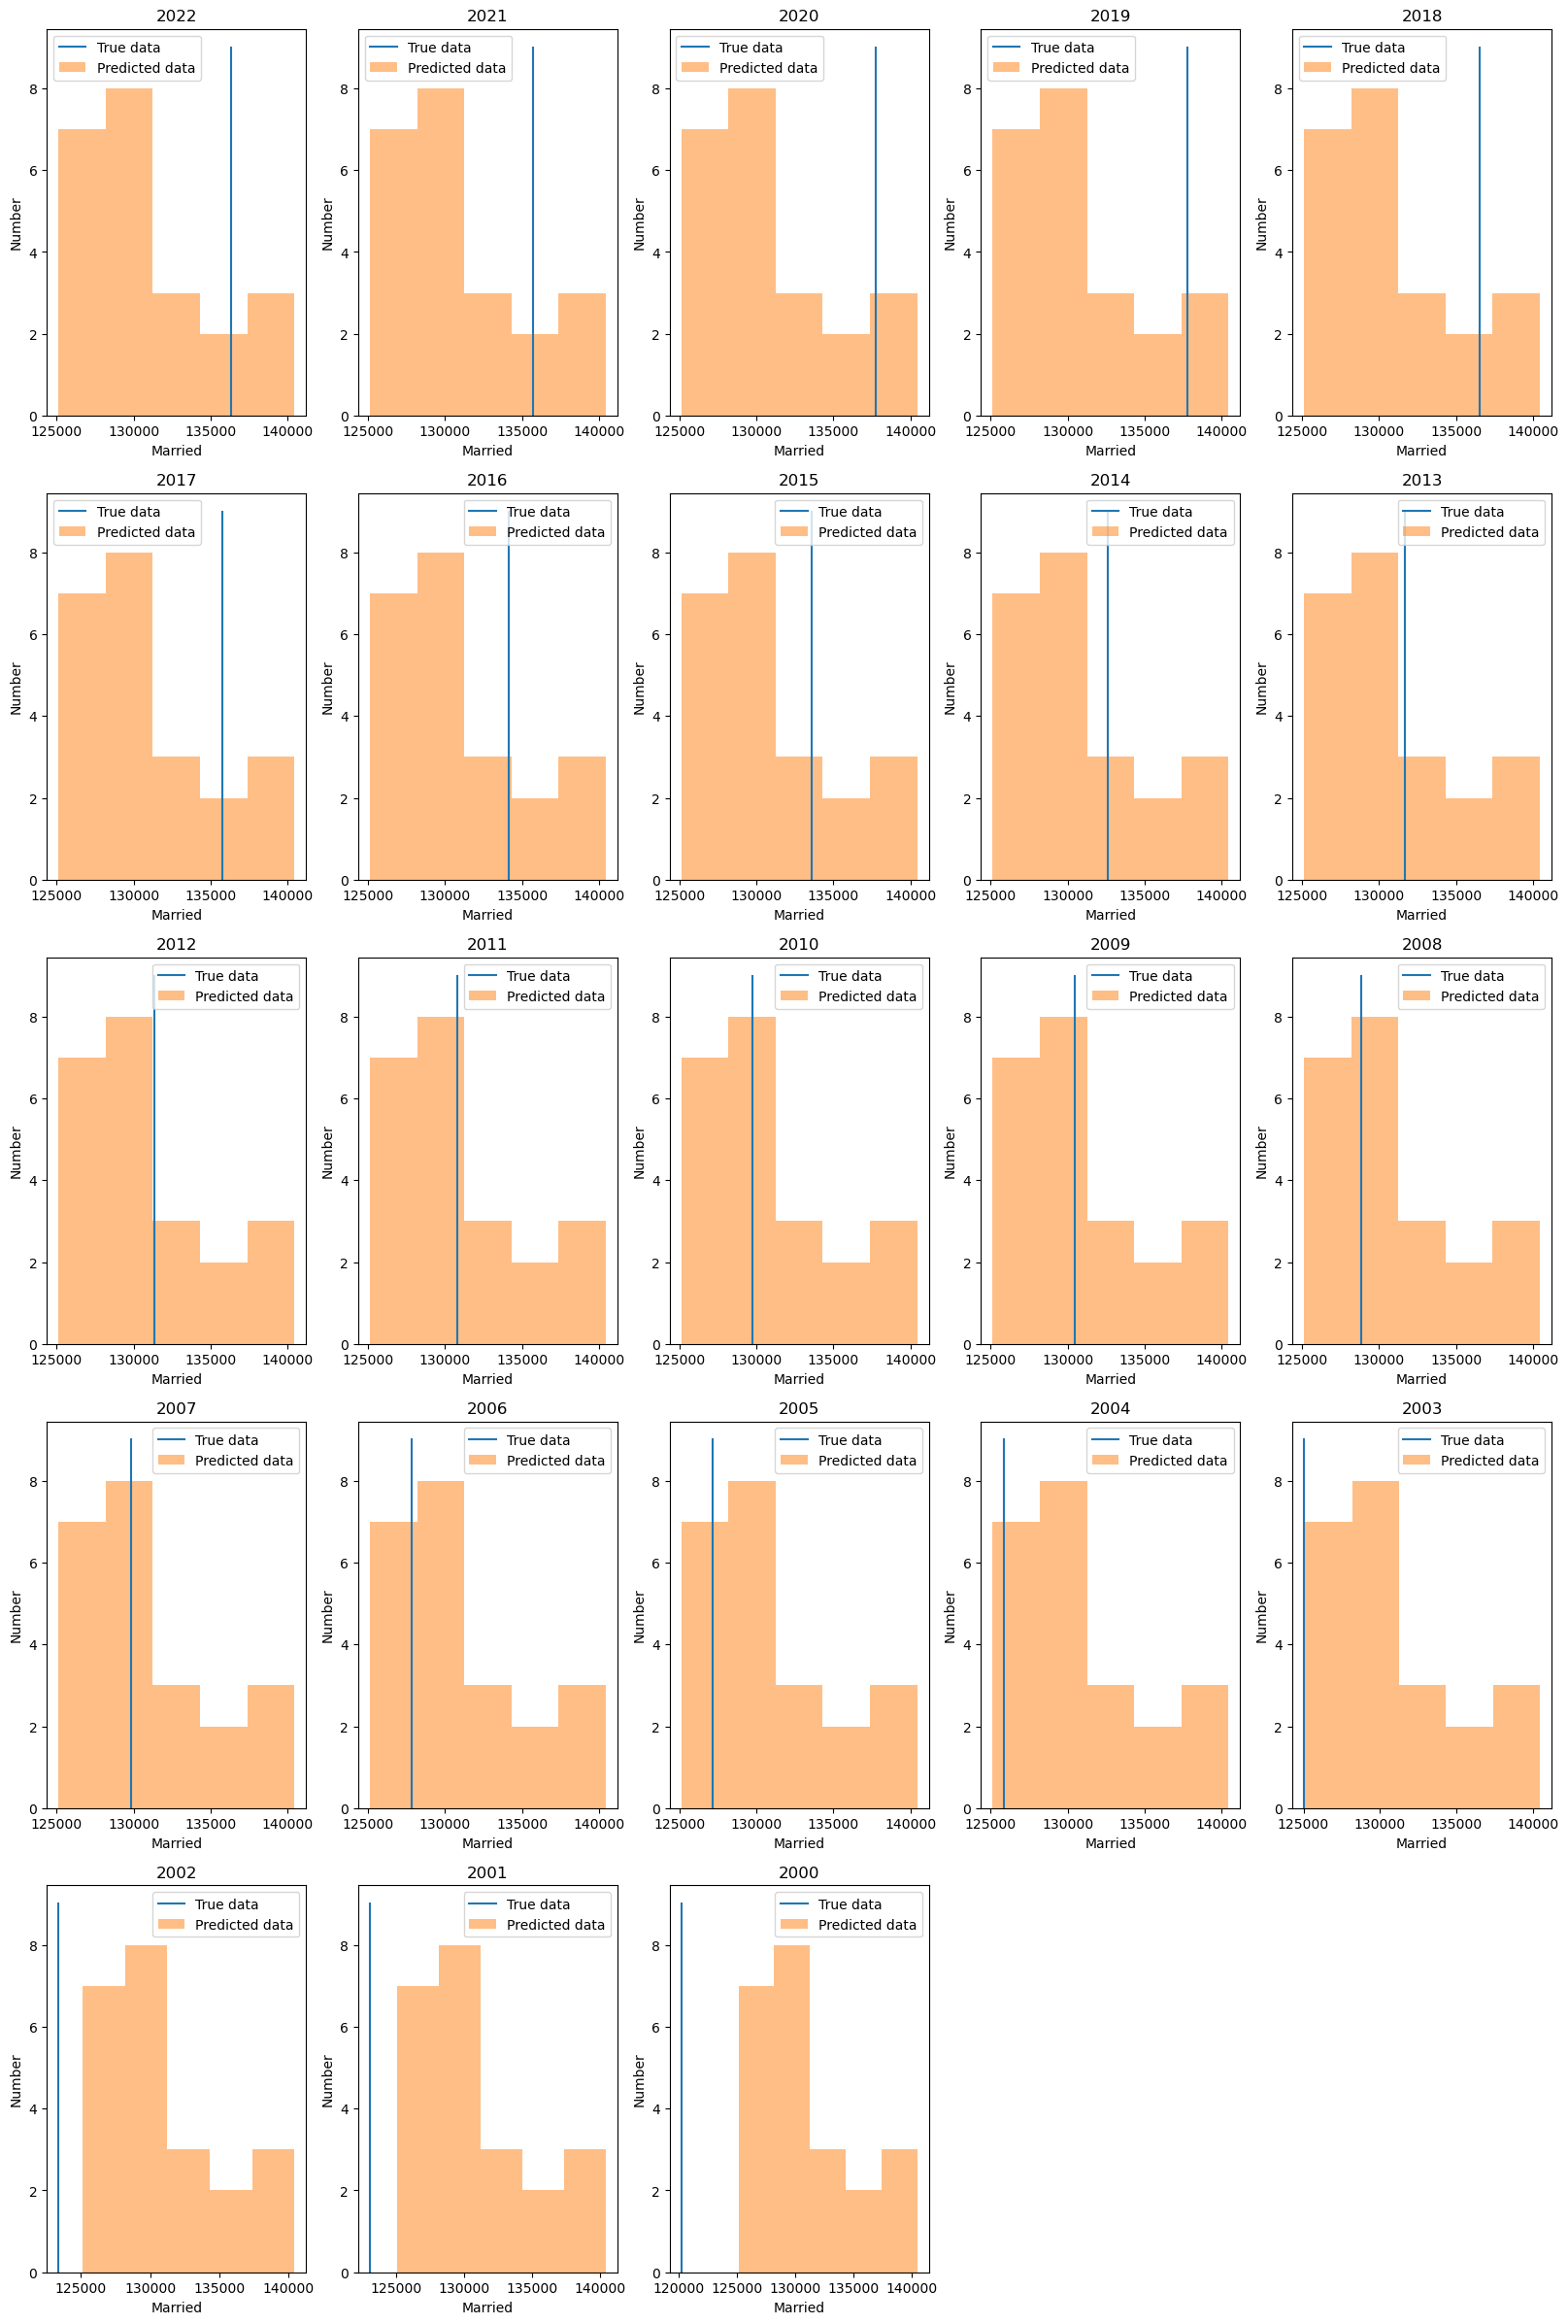

In [319]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_2.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

# Trimodel

In [320]:
model = CmdStanModel(stan_file='triparam_model.stan')
data = {'N': N, 'income': df['Income'], 'mean_age': df['Mean age'], 'household': df['Household']}
gen_tri = model.sample(
                    data=data,
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True)

23:10:40 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model.exe
23:11:04 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model.exe
23:11:04 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
23:11:04 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/triparam_model.hpp C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/triparam_model.stan
Warning in 'C:/Users/Julia/Desktop/DATAAN~1/Project/DA_PRO~1/triparam_model.stan', line 10, column 26: fabs
    is deprecated and will be removed in Stan 2.33.0. Use abs instead. This
    can be automatically changed using the canonicalize flag for stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-functio


23:11:06 - cmdstanpy - INFO - CmdStan done processing.


In [321]:
gen_tri.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.719811,111696.0,0.405335,142166.0,141108.0,139595.0,137393.0,136631.0,...,130606.0,130851.0,130706.0,130441.0,129454.0,128648.0,128230.0,127914.0,127942.0,127625.0
1,0.0,0.0,0.750098,108473.0,0.730621,140225.0,139121.0,137545.0,135252.0,134455.0,...,128178.0,128433.0,128283.0,128005.0,126977.0,126137.0,125703.0,125372.0,125403.0,125072.0
2,0.0,0.0,0.792426,108748.0,0.180551,142291.0,141126.0,139462.0,137038.0,136197.0,...,129565.0,129835.0,129676.0,129382.0,128297.0,127409.0,126950.0,126601.0,126633.0,126284.0
3,0.0,0.0,0.759128,106664.0,0.362789,138798.0,137683.0,136088.0,133765.0,132960.0,...,126607.0,126864.0,126713.0,126433.0,125392.0,124541.0,124102.0,123768.0,123798.0,123463.0
4,0.0,0.0,0.750370,107490.0,0.042529,139253.0,138150.0,136574.0,134278.0,133482.0,...,127202.0,127457.0,127307.0,127029.0,126001.0,125161.0,124726.0,124396.0,124426.0,124096.0
5,0.0,0.0,0.874587,108142.0,0.690171,145163.0,143879.0,142041.0,139365.0,138437.0,...,131117.0,131415.0,131240.0,130916.0,129717.0,128738.0,128232.0,127847.0,127881.0,127497.0
6,0.0,0.0,0.821100,109309.0,1.084950,144068.0,142861.0,141135.0,138622.0,137751.0,...,130879.0,131159.0,130994.0,130692.0,129566.0,128645.0,128169.0,127809.0,127841.0,127481.0
7,0.0,0.0,0.847602,108080.0,1.677570,143955.0,142713.0,140932.0,138339.0,137442.0,...,130343.0,130637.0,130466.0,130150.0,128991.0,128041.0,127549.0,127178.0,127211.0,126836.0
8,0.0,0.0,0.804763,107358.0,0.439201,141424.0,140241.0,138551.0,136088.0,135235.0,...,128500.0,128772.0,128612.0,128314.0,127212.0,126311.0,125843.0,125490.0,125521.0,125168.0
9,0.0,0.0,0.934184,108117.0,0.718122,147661.0,146288.0,144326.0,141467.0,140477.0,...,132658.0,132976.0,132789.0,132443.0,131163.0,130118.0,129576.0,129164.0,129200.0,128789.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


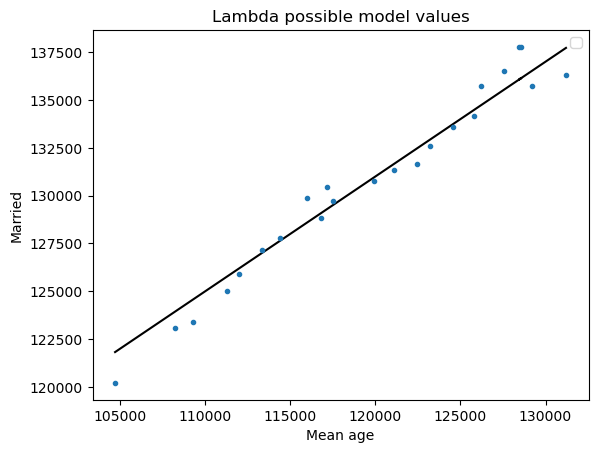

In [ ]:
from numpy import random
alpha = 0.60
beta = 59000

sim = random.normal(alpha*df['Household'] + beta, 1500, 23)


plt.plot(df['Household'], alpha*df['Household'] + beta, color='black')

plt.plot(df['Household'], df['Married'],'.')
plt.title('Lambda possible model values')
plt.xlabel('Mean age')
plt.ylabel('Married')
plt.legend()
plt.show()

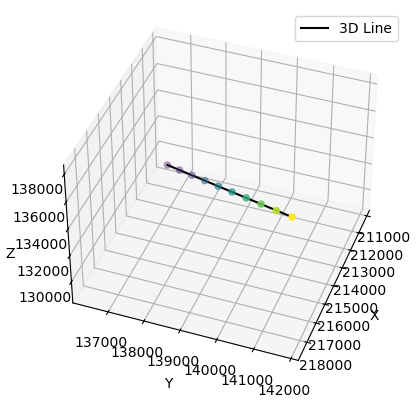

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the linear functions
def y1(x, alpha1, beta1):
    return alpha1 * x + beta1 

def y2(x, alpha2, beta2):
    return alpha2 * x + beta2 

# Example coefficients

# income
alpha1 = 0.8
beta1 = 108000

# household
alpha2 = 0.60
beta2 = 59000


# Generate data points
x = y1(df['Married'], alpha1, beta1)
y = y2(df['Married'], alpha2, beta2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D line
ax.plot(x, y, df['Married'], label='3D Line', c="black")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

zdata = df['Married']
xdata = df['Income']
ydata = df['Household']
ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.view_init(40, 20)
plt.show()

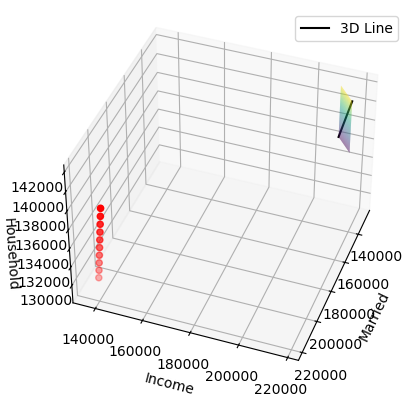

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the linear functions
def y1(x, alpha1, beta1):
    return alpha1 * x + beta1 

def y2(x, alpha2, beta2):
    return alpha2 * x + beta2 

# Example coefficients
# income
alpha1 = 0.8
beta1 = 108000

# household
alpha2 = 0.60
beta2 = 59000

# Sample dataframe with high integer values in 'Married'
data = {'Married': [129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000],
        'Income': [y1(i, alpha1, beta1) for i in range(129000, 139000, 1000)],
        'Household': [y2(i, alpha2, beta2) for i in range(129000, 139000, 1000)]}
df = pd.DataFrame(data)

# Generate data points
x = df['Married']
y_income = y1(x, alpha1, beta1)
y_household = y2(x, alpha2, beta2)

# Generate a mesh grid for the 'Married' variable
x_grid = np.linspace(129000, 138000, 100)
xv, yv = np.meshgrid(x_grid, x_grid)

# Calculate the corresponding income and household values
z_income = y1(xv, alpha1, beta1)
z_household = y2(yv, alpha2, beta2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xv, z_income, z_household, cmap='viridis', alpha=0.6)

# Plot the 3D line
ax.plot(x, y_income, y_household, label='3D Line', c="black")

# Scatter plot for actual data points
zdata = df['Married']
xdata = df['Income']
ydata = df['Household']
ax.scatter3D(xdata, ydata, zdata, c='red')

# Set labels and legend
ax.set_xlabel('Married')
ax.set_ylabel('Income')
ax.set_zlabel('Household')
ax.legend()

# Set view angle
ax.view_init(40, 20)

plt.show()
